In [2]:
import config
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams.update({"font.size":20})
import scipy.stats

# TREE PREF

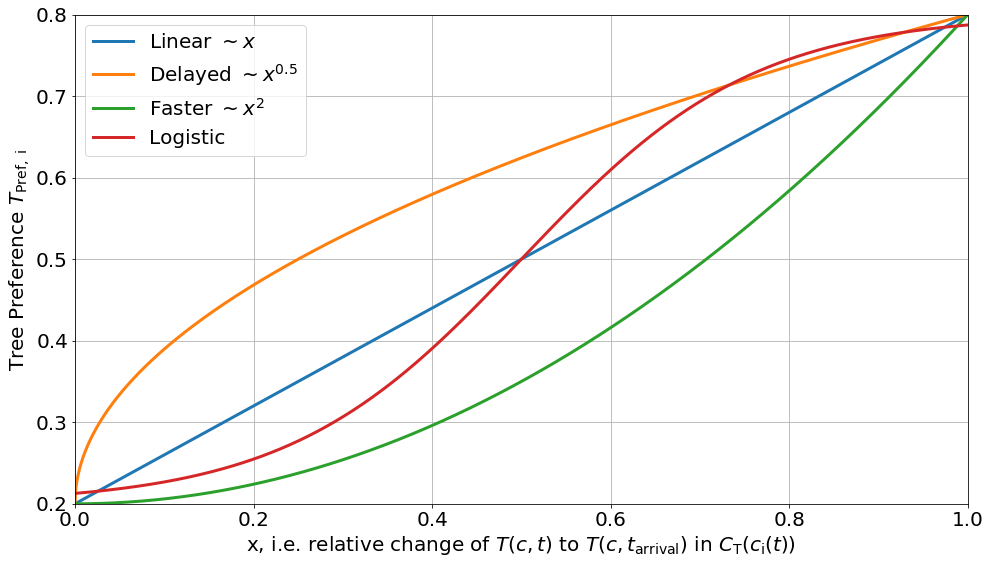

In [3]:
x = np.linspace(0,1, 1000)
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.set_ylabel(r"Tree Preference $T_{\rm Pref, \ i}$")
ax.set_xlabel(r"x, i.e. relative change of $T(c,t)$ to $T(c,t_{\rm arrival})$ in $C_{\rm T}(c_{\rm i}(t))$")

config.T_Pref_max = 0.8
config.T_Pref_min=0.2
def get_f(TPrefOption):
    if TPrefOption =="linear":
        config.f_T_Pref = lambda x: x*(config.T_Pref_max-config.T_Pref_min)+config.T_Pref_min
    elif TPrefOption=="careful":
        config.f_T_Pref = lambda x: x**2*(config.T_Pref_max-config.T_Pref_min)+config.T_Pref_min
    elif TPrefOption=="delayed":
        config.f_T_Pref  = lambda x: x**0.5*(config.T_Pref_max-config.T_Pref_min)+config.T_Pref_min
    elif TPrefOption=="logistic":
        config.xi_T_Pref = 1/(config.T_Pref_max - config.T_Pref_min) * np.log(0.99/0.01)
        config.f_T_Pref = lambda x: config.logistic(x,config.xi_T_Pref, 0.5)*(config.T_Pref_max-config.T_Pref_min)+config.T_Pref_min
    return 


get_f("linear")
plt.plot(x,config.f_T_Pref(x), lw=3, label=r"Linear $\sim x$")
get_f("delayed")
plt.plot(x, config.f_T_Pref(x), lw=3, label=r"Delayed $\sim x^{0.5}$")
get_f("careful")
plt.plot(x, config.f_T_Pref(x), lw=3, label=r"Faster $\sim x^2$")
get_f("logistic")
plt.plot(x, config.f_T_Pref(x), lw =3, label=r"Logistic")
ax.set_xlim(0,1)
ax.set_ylim(0.2, 0.8)
plt.legend()
plt.grid()
plt.savefig("TPref.pdf", bbox_inches='tight')

# PENALTIES

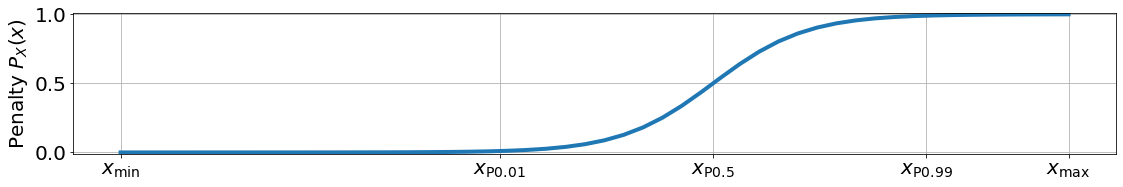

In [5]:
import config
import matplotlib.pyplot as plt 
import numpy as np 
#k_X = lambda x01,x99: 1/(0.5*(x99-x01)) * np.log(0.99/0.01)
#P_x = lambda x, k_x, x50: 1/(1+np.exp(-k_x*(x-x50)))  # x50 = (x99+x01)/2
plt.rcParams.update({"font.size":20})
x = np.linspace(0,100)
x01 = 40
x99 = 85
kx = config.k_X(x01, x99)
fig= plt.figure(figsize=(16,3))
ax=fig.add_subplot(111)
ax.plot(x, config.P_x(x, kx, (x01+x99)/2 ), lw=4)
#ax.set_xlabel("$x$")
plt.grid()

ax.set_xticks([0,x01,x01*0.5+x99*0.5,x99,100])
ax.set_xticklabels([r"$x_{\rm min}$", r"$x_{\rm P0.01}$", r"$x_{\rm P0.5}$", r"$x_{\rm P0.99}$", r"$x_{\rm max}$"])
ax.set_ylabel(r"Penalty $P_X(x)$")
ax.set_ylim(-0.01,1.01)
ax.set_yticks([0,0.5,1])
fig.tight_layout()
plt.savefig("general_logF.pdf", bbox_inches = "tight")


#### Penal to Prob

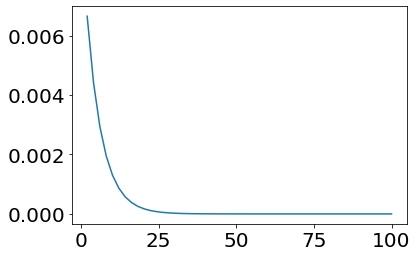

In [29]:
plt.plot(x[1:], np.exp(-0.2*x[1:])/100)
plt.savefig("PenalTOProb.pdf")

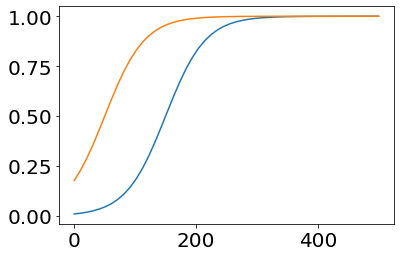

In [21]:
x =  np.linspace(0,500)
k_D = config.k_X(0,300)
plt.plot(x,config.logistic(x, k_D, 150) )
plt.plot(x,config.logistic(x, k_D, 50) )

In [18]:
plt.plot(x)

0.11920292202211755

# Growth Rate Population

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
x= np.linspace(0,1, 200)

Food Fraction at which equilibrium food [0.68844221]
g[1]= 1.007
Food Fraction at which equilibrium food [0.84422111]
g[1]= 1.007


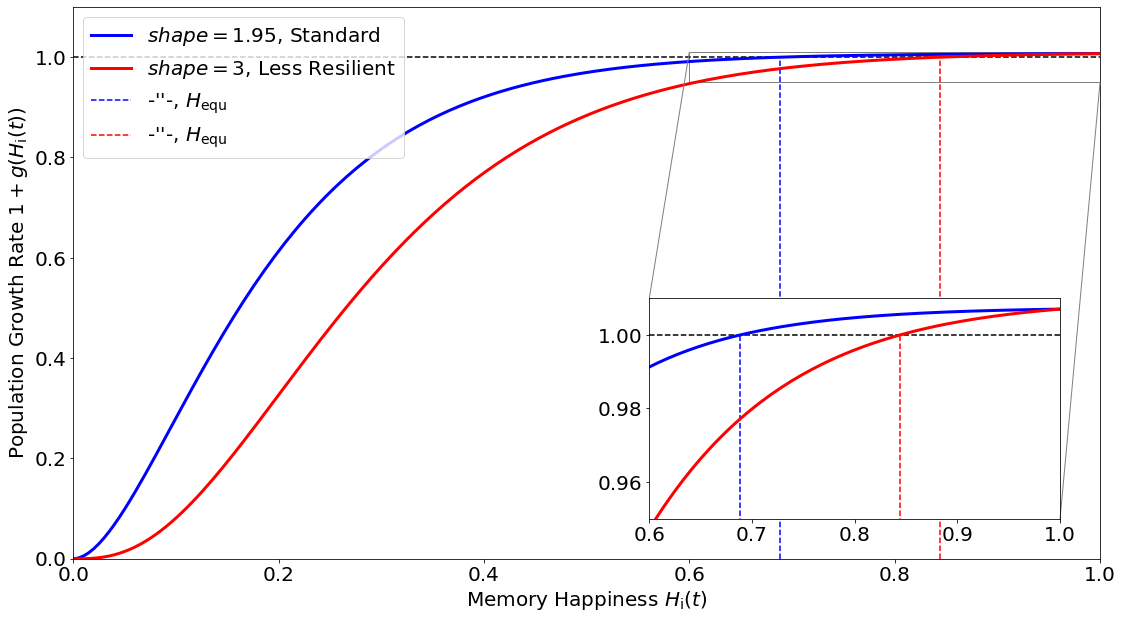

In [11]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
plt.rcParams.update({"font.size":20})
shapes = [1.95,3]
config.g_H1 = 1.007  # Bahn Flenley 2017 (with 800 A.D.)

text = ["Standard", "Less Resilient"]
colors=["blue", "red"]
for n,g_shape in enumerate(shapes):
   
    config.g_shape =   g_shape  # roughly tuned to get g(H_equ)=1
    #config.H_equ = 0.6883 # Puleston 2017

    # ALTERNATIVE: config.g_shape = 3
    config.g_scale = 0.1 # as in Lee2008
    config.g_scale_param = (config.g_H1)/ ( scipy.stats.gamma.cdf(1,    config.g_shape, scale =config.g_scale)) # Lee 2008 and Puleston 2017

    config.g_of_H = lambda x: config.g_scale_param* scipy.stats.gamma.cdf(x,config.g_shape, scale = config.g_scale) # Lee 2008 and Puleston 2017
    g = config.g_of_H(x)
    H_equ = x[np.where(np.min(abs(g-1)) == abs(g-1))]
    print("Food Fraction at which equilibrium food", H_equ)
    print("g[1]=", g[-1])
    ax.plot(x,g, lw=3, color=colors[n], label=r"$shape=$"+str(g_shape)+", "+text[n])
    ax.vlines(H_equ, 0,1, color=colors[n], linestyles="--", label=r"-''-, $H_{\rm equ}$")
plt.legend(loc="upper left")
ax.set_xlabel(r"Memory Happiness $H_{\rm i}(t)$")
ax.set_ylabel(r"Population Growth Rate $1+g(H_{\rm i}(t))$")
ax.set_ylim(0,1.1)
ax.set_xlim(0,1)
ax.hlines(1,0,1, linestyles= '--')


ax2 = inset_axes(ax,
                    width="40%", # width = 30% of parent_bbox
                    height="40%", # height : 1 inch
                    loc=4, 
                    borderpad = 2)
for n,g_shape in enumerate(shapes):
   
    config.g_shape =   g_shape  # roughly tuned to get g(H_equ)=1
    #config.H_equ = 0.6883 # Puleston 2017

    # ALTERNATIVE: config.g_shape = 3
    config.g_scale = 0.1 # as in Lee2008
    config.g_scale_param = (config.g_H1)/ ( scipy.stats.gamma.cdf(1,    config.g_shape, scale =config.g_scale)) # Lee 2008 and Puleston 2017

    config.g_of_H = lambda x: config.g_scale_param* scipy.stats.gamma.cdf(x,config.g_shape, scale = config.g_scale) # Lee 2008 and Puleston 2017
    g = config.g_of_H(x)
    H_equ = x[np.where(np.min(abs(g-1)) == abs(g-1))]

    ax2.plot(x,g, lw=3, color=colors[n], label=r"$shape=$"+str(g_shape)+", "+text[n])
    ax2.vlines(H_equ, 0,1, color=colors[n], linestyles="--", label=r"-''-, $H_{\rm equ}$")
ax2.set_ylim(0.95,1.01)
ax2.set_xlim(0.6,1)
ax2.hlines(1, ax2.get_xlim()[0],1, linestyles= '--')

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec="0.5")

#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#axins = zoomed_inset_axes(ax, 2.5, loc=2)
fig.tight_layout()
plt.savefig("populationchange_g.pdf", bbox_inches="tight")

# F PI MAP

In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import observefunc as obs
plt.rcParams.update({"font.size":18})

import pickle
import config
from pathlib import Path   # for creating a new directory
filename = "Map/EI_grid"+str(50)+"_rad"+str(2)+"+"+str(1)+"+"+str(5)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)
plt.rcParams.update({"font.size":20})


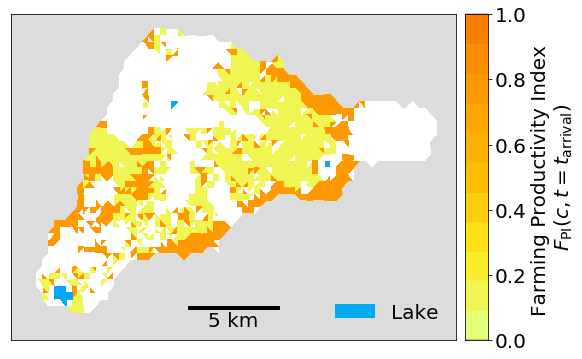

In [4]:
obs.plot_F_PI_Map()

# Plot Single Penalties

In [8]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import observefunc as obs
plt.rcParams.update({"font.size":18})

import pickle
import config
from pathlib import Path   # for creating a new directory
filename = "Map/EI_grid"+str(50)+"_rad"+str(2)+"+"+str(1)+"+"+str(5)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)
plt.rcParams.update({"font.size":20})


In [57]:
from CreateEI_ExtWaterExtAgricPaper import Map

config.EI = Map(50,
            2,
            1,
            5,
            N_init_trees = 1e6, 
            angleThreshold=35)

Elevation:  0 255 (600, 900)
Slope:  0 255 (600, 900)
Dimensions are  [(-109.465, -109.2227), (-27.205, -27.0437)]
1 pixel vertically is [degree lat/pixel]: 0.00026883 , horizontally is [degree lon/pixel]: 0.00026922
km per pixel vertical:  0.0299
km per pixel horizontal:  0.0267
Box is [km vertically, km horizontally]  17.9559 24.0063
Nr of cornerpoints on EI:  1470  of total gridpoints  3750
Points on EI x (km between points):  [0.3200845313120152, 0.35911831999999355]
Masked out triangles:  145
nr of triangles (after masking):  2768  (before):  2913
Area of discretised Map is [km2]  159.2033
Average triangle area [km2] is  0.05751563710719559  +-  0.001544355401962748
  i.e. a triangle edge is on average long:  0.3391626073351707
Average triangle area [acres] is  14.212423420831302  +-  0.38161853000141305
Corners:  {'upper_left': [0.0, 17.955915999999675], 'upper_right': [24.00633984840114, 17.955915999999675], 'lower_left': [0.0, 0.0], 'lower_right': [24.00633984840114, 0.02992652

In [40]:

config.el01 = 0
config.el99 = 300
config.sl01=0
config.sl99=7.5
config.EI.get_P_G()


In [56]:
config.w01 = 0.5**2/(np.pi*0.170**2)
config.w99=5.0**2/(np.pi*0.170**2)
config.droughts_RanoRaraku=[[config.t_arrival, 1200], [1570, 1720]]
config.t_arrival=800
config.EI_triObject = mpl.tri.Triangulation(config.EI.points_EI_km[:,0], config.EI.points_EI_km[:,1], triangles = config.EI.all_triangles, mask=config.EI.mask)
config.EI.check_drought(700, config.droughts_RanoRaraku, config.EI_triObject)


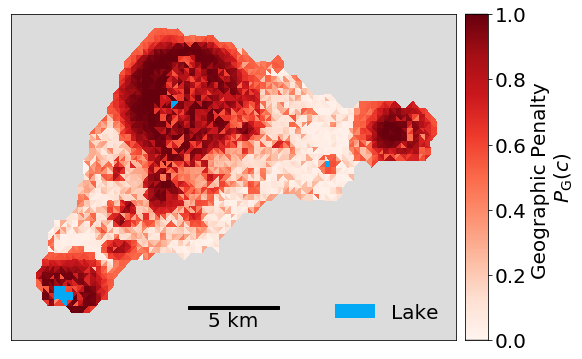

In [41]:
label = "Geographic Penalty \n"+r"$P_{\rm G}(c)$"
obs.plot_Penalty_Map(config.EI.P_G, label,  "PG")


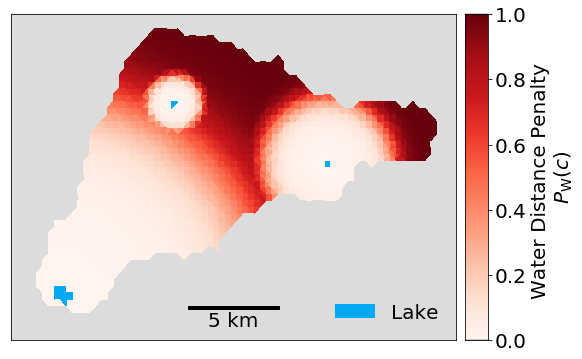

In [58]:
label = "Water Distance Penalty \n"+r"$P_{\rm W}(c)$"
obs.plot_Penalty_Map(config.EI.P_W_NoDrought, label,  "PW")

# Carrying Cap

In [25]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import observefunc as obs
plt.rcParams.update({"font.size":18})
from copy import copy

import pickle
import config
from pathlib import Path   # for creating a new directory
filename = "Map/EI_grid"+str(50)+"_rad"+str(2)+"+"+str(1)+"+"+str(5)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)
plt.rcParams.update({"font.size":20})


In [26]:
config.N_trees_arrival=16e6
config.droughts_RanoRaraku=[[0,0], [0,0]]
config.EI_triObject = mpl.tri.Triangulation(config.EI.points_EI_km[:,0], config.EI.points_EI_km[:,1], triangles = config.EI.all_triangles, mask=config.EI.mask)
print("Initialising Trees, ...")
config.EI.init_trees(config.N_trees_arrival)
print("Total Trees:", np.sum(config.EI.T_c))
print("Fraction of islands with forest: ", 
    np.sum([config.EI.A_c[i] for i in range(config.EI.N_c) if config.EI.T_c[i]>0])/
    (np.sum(config.EI.A_c)))
config.EI.carrying_cap = copy(config.EI.T_c)


Initialising Trees, ...
Total Trees: 16000000
Fraction of islands with forest:  0.8617328519855596


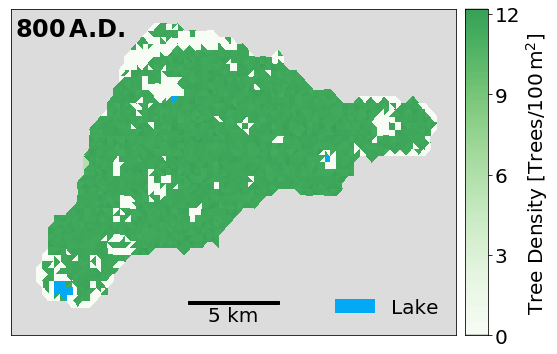

In [29]:
obs.observe(800, fig=None, ax=None, specific_ag_to_follow=None, save=False, data = None, ncdf=False, folder=None, posSize_small=False, legend=False, cbar=[True, False, False], cbarax=None)
plt.savefig(folder+"map_carrCap.pdf", bbox_inches="tight")
